In [1]:
import torch
print("是否可用：", torch.cuda.is_available())        # 查看GPU是否可用
print("GPU数量：", torch.cuda.device_count())        # 查看GPU数量
print("torch方法查看CUDA版本：", torch.version.cuda)  # torch方法查看CUDA版本
print("GPU索引号：", torch.cuda.current_device())    # 查看GPU索引号
print("GPU名称：", torch.cuda.get_device_name(0))    # 根据索引号得到GPU名称

是否可用： True
GPU数量： 1
torch方法查看CUDA版本： 12.4
GPU索引号： 0
GPU名称： NVIDIA GeForce RTX 4060 Laptop GPU


In [2]:
%pip install -Uq diffusers ftfy accelerate

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install -Uq git+https://github.com/huggingface/transformers 

Note: you may need to restart the kernel to use updated packages.


In [5]:
import torch
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt


# We'll be exploring a number of pipelines today!
from diffusers import (
    StableDiffusionPipeline,
    StableDiffusionImg2ImgPipeline,
    StableDiffusionInpaintPipeline,
    StableDiffusionDepth2ImgPipeline
)

# We'll use a couple of demo images later in the notebook


def download_image(url):
    response = requests.get(url)
    return Image.open(BytesIO(response.content)).convert("RGB")


# Download images for inpainting example
img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

init_image = download_image(img_url).resize((512, 512))
mask_image = download_image(mask_url).resize((512, 512))

In [6]:
# Set device
device = (
    "mps"
    if torch.backends.mps.is_available()
    else "cuda"
    if torch.cuda.is_available()
    else "cpu"
)

In [8]:
model_id = "stabilityai/stable-diffusion-2-1-base"
pipe = StableDiffusionPipeline.from_pretrained(model_id).to(device)

Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00, 24.98it/s]


c:\Users\Jason\anaconda3\envs\wtorch\Lib\site-packages\transformers\models\clip\modeling_clip.py:491: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(
100%|██████████| 35/35 [05:48<00:00,  9.94s/it]


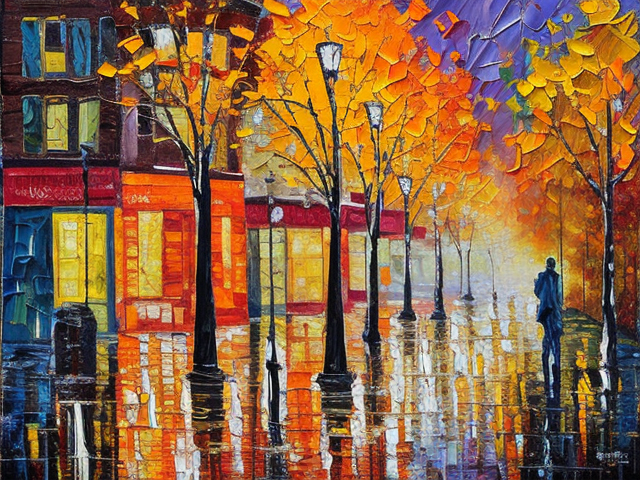

In [9]:
# Set up a generator for reproducibility
generator = torch.Generator(device=device).manual_seed(42)

# Run the pipeline, showing some of the available arguments
pipe_output = pipe(
    prompt="Palette knife painting of an autumn cityscape",  # What to generate
    negative_prompt="Oversaturated, blurry, low quality",  # What NOT to generate
    height=480, width=640,     # Specify the image size
    guidance_scale=8,          # How strongly to follow the prompt
    num_inference_steps=35,    # How many steps to take
    generator=generator        # Fixed random seed
)

# View the resulting image
pipe_output.images[0]

100%|██████████| 35/35 [03:07<00:00,  5.35s/it]


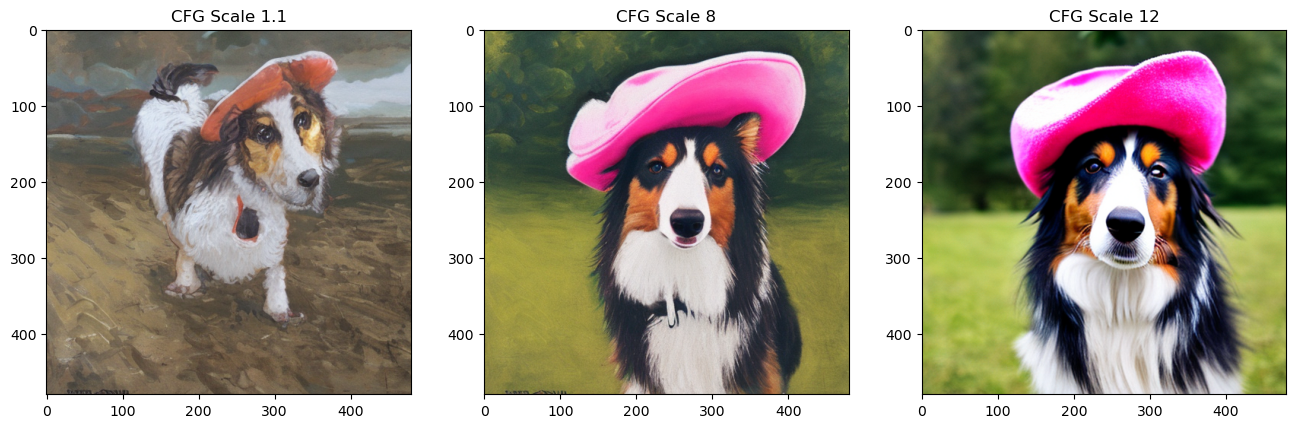

In [10]:

cfg_scales = [1.1, 8, 12] #@param
prompt = "A collie with a pink hat" #@param
fig, axs = plt.subplots(1, len(cfg_scales), figsize=(16, 5))
for i, ax in enumerate(axs):
  im = pipe(prompt, height=480, width=480,
    guidance_scale=cfg_scales[i], num_inference_steps=35,
    generator=torch.Generator(device=device).manual_seed(42)).images[0]
  ax.imshow(im); ax.set_title(f'CFG Scale {cfg_scales[i]}');